In [55]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [52]:
Kanch = pd.read_csv('https://raw.githubusercontent.com/ferdinjoe/DSA206/main/kanchanaburi_pm25.csv')
Rayong= pd.read_csv('https://raw.githubusercontent.com/ferdinjoe/DSA206/main/rayongmaptaphut_pm25.csv')
Nara= pd.read_csv('https://raw.githubusercontent.com/ferdinjoe/DSA206/main/narathiwat_pm25.csv')

In [68]:
Kanch.drop(Kanch[Kanch['PM2.5'] == 0].index, inplace = True)
Rayong.drop(Rayong[Rayong['PM2.5'] == 0].index, inplace = True)
Nara.drop(Nara[Nara['PM2.5'] == 0].index, inplace = True)

<function matplotlib.pyplot.show(close=None, block=None)>

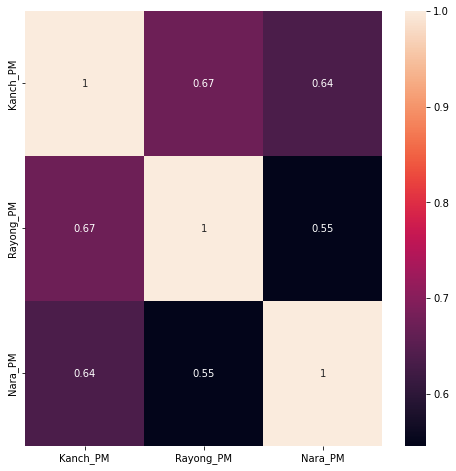

In [69]:
#1. Perform correlation analysis on PM2.5 data obtained from the provinces of Kanchanaburi, Rayong and Narathiwat. 
# Display the correlation matrix using plasma colormap.
Kanch_PM = pd.DataFrame({"Kanch_PM":Kanch['PM2.5']})
Rayong_PM = pd.DataFrame({"Rayong_PM":Rayong['PM2.5']})
Nara_PM = pd.DataFrame({"Nara_PM":Nara['PM2.5']})
PMS = pd.concat([Kanch_PM,Rayong_PM,Nara_PM], axis=1, join='inner')

KRN_PM_CORR =PMS.corr()
plt.figure(figsize=(8,8))
sns.heatmap(KRN_PM_CORR, annot=True)
plt.show

([<matplotlib.axis.XTick at 0x1806b370>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

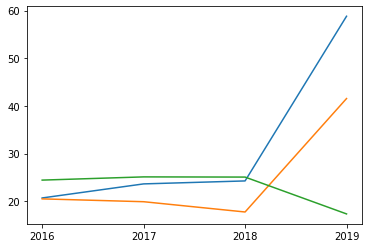

In [89]:
#2.Perform year-wise trend of line plot for all the data
Kanch_AVG = Kanch.groupby(['Year'])['PM2.5'].mean().reset_index()
Rayong_AVG = Rayong.groupby(['Year'])['PM2.5'].mean().reset_index()
Nara_AVG = Nara.groupby(['Year'])['PM2.5'].mean().reset_index()

plt.plot(Kanch_AVG['Year'],Kanch_AVG['PM2.5'])
plt.plot(Rayong_AVG['Year'],Rayong_AVG['PM2.5'])
plt.plot(Nara_AVG['Year'],Nara_AVG['PM2.5'])

plt.xticks(range(2016,2020))

In [80]:
#3. Display a pie chart with explosion on any of the data with 0-50 as normal 50-100 moderate and 100+ for abnormal
labels_PM = ['normal', 'moderate', 'abnormal']
bins_PM = [0,50,100,1000]
Kanch['status'] = pd.cut(Kanch['PM2.5'], bins=bins_PM, labels=labels_PM)

In [76]:
Kanch[Kanch['PM2.5']>100]

,Year,Month,Day,UTC Hour,PM2.5,PM10_mask,Retrospective,status
441,2016,3,21,23,112.7,0,0,abnormal
11942,2017,8,22,12,138.9,0,0,abnormal
15336,2018,1,24,15,102.4,0,0,abnormal
15337,2018,1,24,16,100.2,0,0,abnormal
15347,2018,1,25,2,100.8,0,0,abnormal
...,...,...,...,...,...,...,...,...
23655,2019,2,1,1,109.0,115,0,abnormal
23656,2019,2,1,2,109.0,114,0,abnormal
23657,2019,2,1,3,108.0,114,0,abnormal
23658,2019,2,1,4,107.0,114,0,abnormal


In [92]:
Kanch[Kanch['PM2.5']>50]

,Year,Month,Day,UTC Hour,PM2.5,PM10_mask,Retrospective,status
0,2016,3,3,8,65.2,1,0,moderate
1,2016,3,3,9,65.2,1,0,moderate
2,2016,3,3,10,64.9,1,0,moderate
3,2016,3,3,11,64.9,1,0,moderate
9,2016,3,3,17,64.1,1,0,moderate
...,...,...,...,...,...,...,...,...
23756,2019,2,5,6,65.0,66,0,moderate
23757,2019,2,5,7,63.0,70,0,moderate
23758,2019,2,5,8,64.0,68,0,moderate
23782,2019,2,6,8,53.0,65,0,moderate


In [78]:
Kanch[Kanch['PM2.5']<50]

,Year,Month,Day,UTC Hour,PM2.5,PM10_mask,Retrospective,status
4,2016,3,3,12,38.4,1,0,normal
5,2016,3,3,13,39.0,1,0,normal
6,2016,3,3,14,30.1,1,0,normal
7,2016,3,3,15,32.3,1,0,normal
8,2016,3,3,16,32.0,1,0,normal
...,...,...,...,...,...,...,...,...
23803,2019,2,7,5,35.0,45,0,normal
23804,2019,2,7,6,35.0,45,0,normal
23805,2019,2,7,7,42.0,56,0,normal
23806,2019,2,7,8,47.0,64,0,normal
